### Import necessary libraries : 

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Load the dataset : 

In [7]:
df = pd.read_csv('Ecommerce Customers.csv')

In [9]:
df.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


# -------------------------------------------- EDA --------------------------------------- 

#### About the Dataset : 
1. Email - unique email for each user (Identifying user uniquely)
2. Address - Address of the user.
3. Avatar - basically like profile picture somewhat like that. 
4. Avg.Session Length - How much time they talked with their stylist in person in a clothing store. 
5. Time on App - How much time they spend on mobile or desktop application before ordering. 
6. Time on website - How much time they spend on website before ordering. 
7. Length of Mmebership - For how long they have been a member for clothing store. 
8. Yearly Amount Spent - How much amount did they spend on clothing store yearly.  (Target variable)

In [13]:
# shape 
df.shape

(500, 8)

In [15]:
# columns 
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [17]:
# Basic info : 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [19]:
# Basic statistics summary 
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


#### Domain Knowledge feature selection : 
###### Imp features : 'Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership', 'Yearly Amount Spent'
###### Irrelevant Features relative to the aim : 'Email', 'Address', 'Avatar' 

In [25]:
# Drop irrelevant columns : 
rel_df = df.drop(columns=['Email', 'Address', 'Avatar'], axis=1)

In [27]:
rel_df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [29]:
# Check for missing values : 
rel_df.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [31]:
rel_df.duplicated().sum()

0

In [33]:
rel_df.rename(columns={
    'Avg. Session Length' : 'avg_session_length',
    'Time on App' : 'time_spent_on_app',
    'Time on Website' : 'time_spent_on_website', 
    'Length of Membership' : 'length_of_membership', 
    'Yearly Amount Spent' : 'yearly_amount_spent'
    
}, inplace=True)

In [35]:
rel_df

,avg_session_length,time_spent_on_app,time_spent_on_website,length_of_membership,yearly_amount_spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


#### Univarate analysis Insights are clearly understadable from basic statistics summary. 

#### Bi-variate Analysis : avg_session_length,	time_spent_on_app,	time_spent_on_website,	length_of_membership,	yearly_amount_spent 
### 1 . avg_session_length vs yearly_amount_spent 

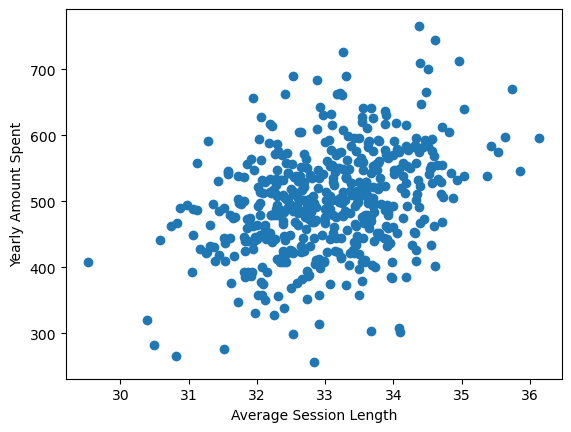

In [40]:
plt.scatter(rel_df['avg_session_length'], rel_df['yearly_amount_spent'])
plt.xlabel("Average Session Length")
plt.ylabel("Yearly Amount Spent")
plt.show()

#### 2 : time_spent_on_app vs yearly_amount_spent

C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


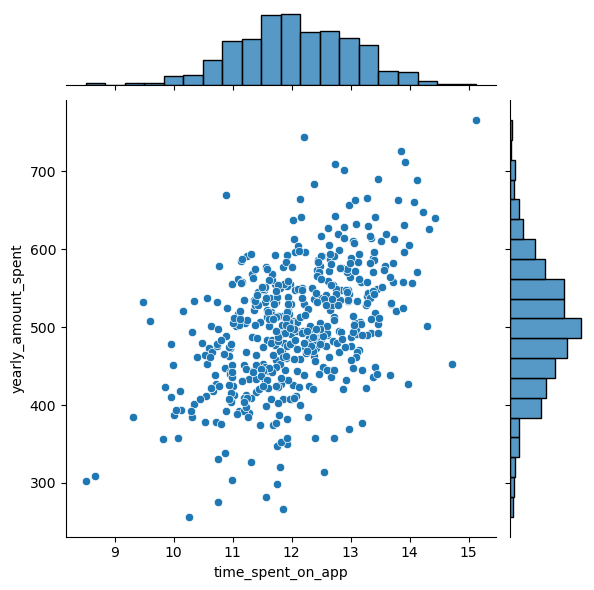

In [43]:
sns.jointplot(x='time_spent_on_app', y='yearly_amount_spent', data=rel_df)

C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='time_spent_on_app', ylabel='yearly_amount_spent'>

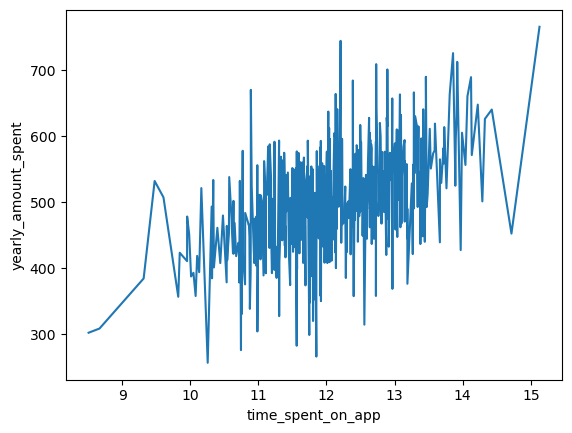

In [45]:
sns.lineplot(x=rel_df['time_spent_on_app'], y=rel_df['yearly_amount_spent'])

#### 3 : time_spent_on_website vs yearly_amount_spent 

C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


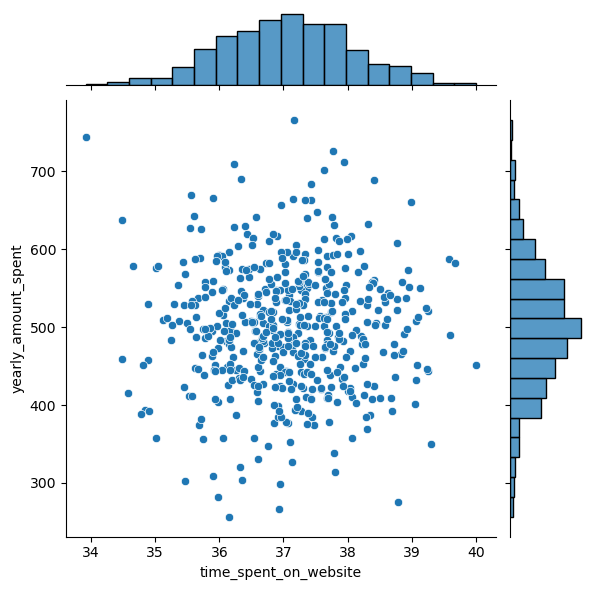

In [48]:
sns.jointplot(x='time_spent_on_website', y='yearly_amount_spent', data=rel_df)

C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='time_spent_on_website', ylabel='yearly_amount_spent'>

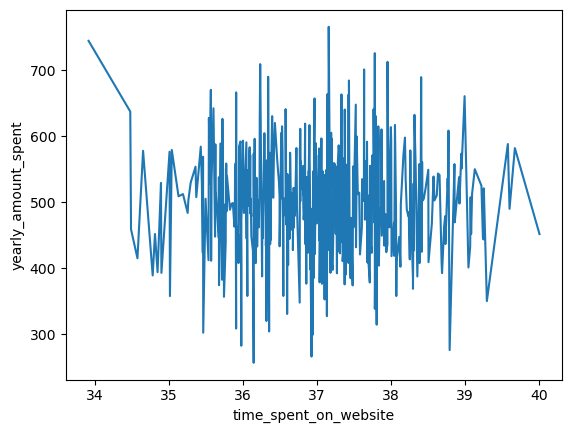

In [50]:
sns.lineplot(x=rel_df['time_spent_on_website'], y=rel_df['yearly_amount_spent'])

#### length_of_membership vs yearly_amount_spent 

C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


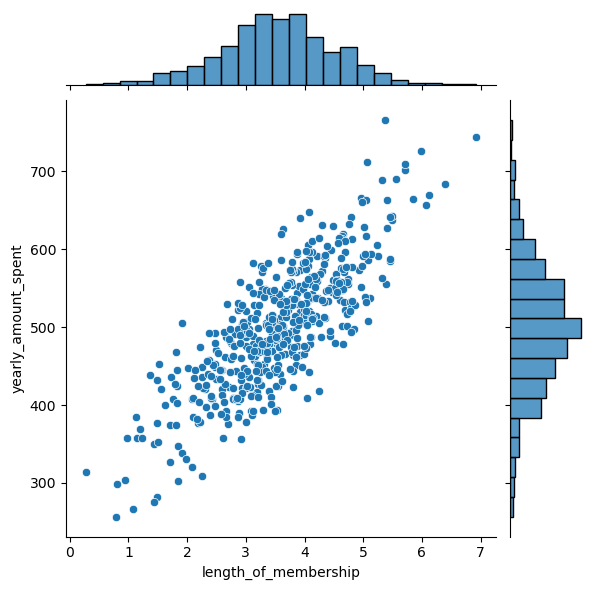

In [53]:
sns.jointplot(x='length_of_membership', y='yearly_amount_spent', data=rel_df)

### Multivariate Analysis 

C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

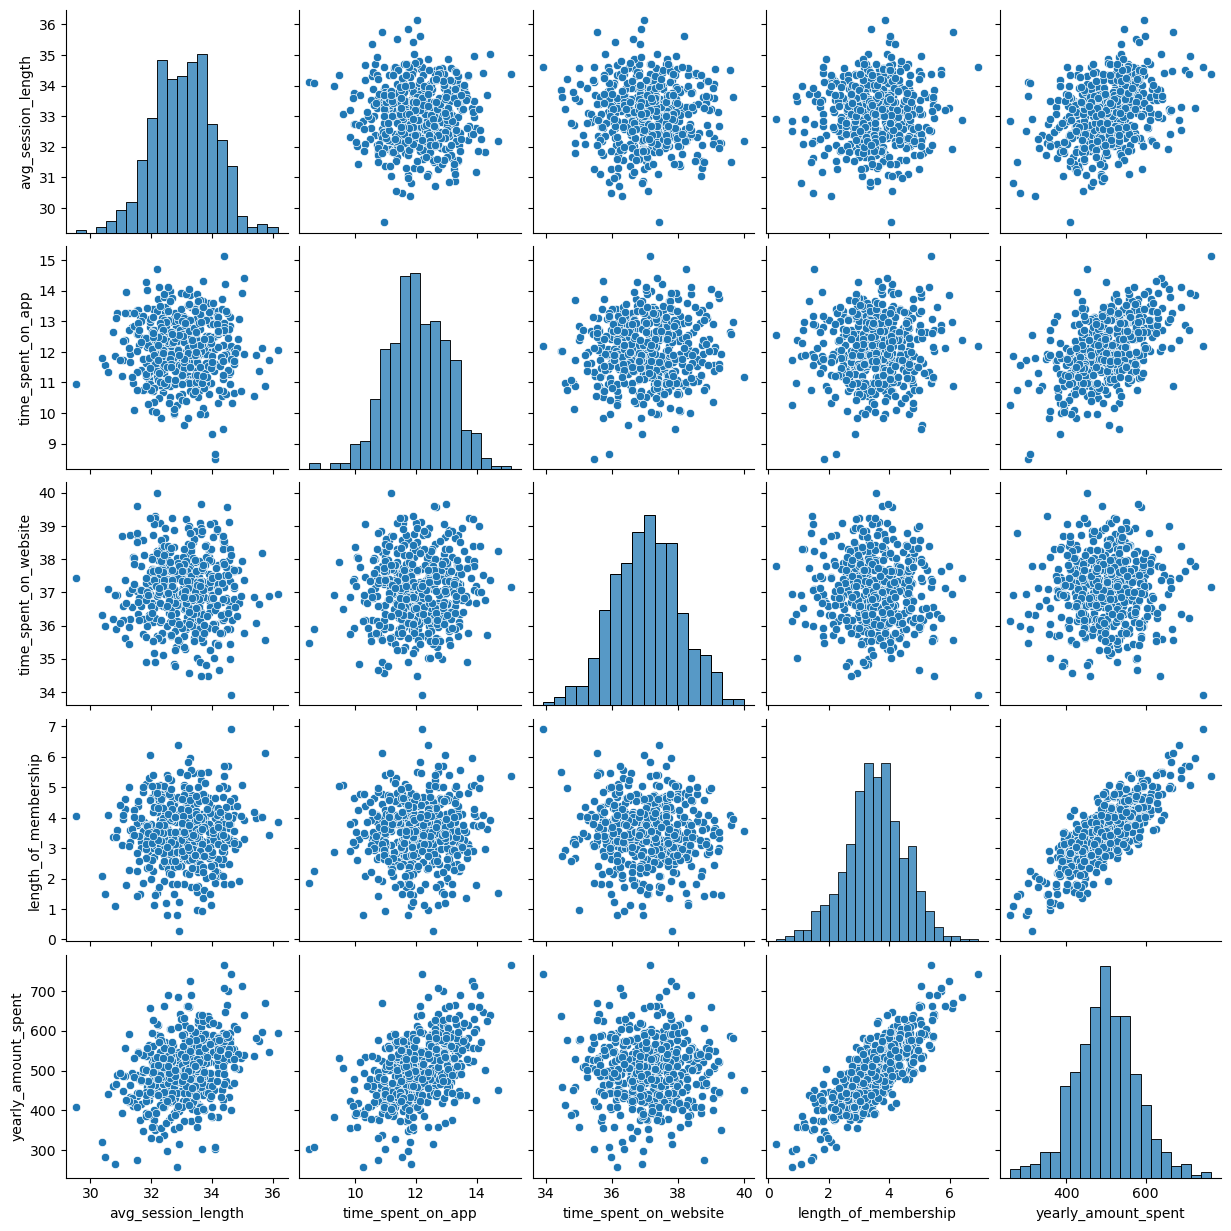

In [56]:
sns.pairplot(rel_df)

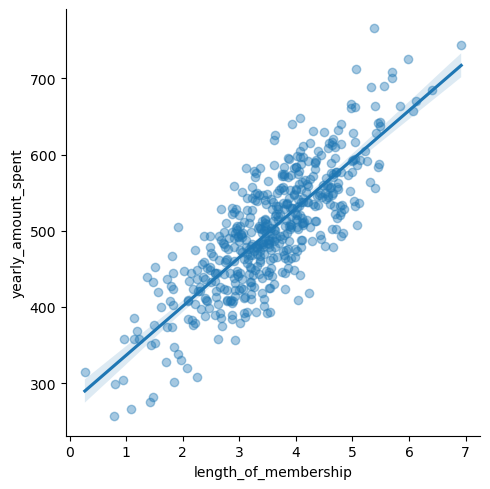

In [58]:
# Linear Regression relationship : 
sns.lmplot(x='length_of_membership', y='yearly_amount_spent', data=rel_df, scatter_kws={'alpha':0.4})

### Splitting of data

In [61]:
# Split the data : 
X = rel_df.drop('yearly_amount_spent', axis=1)
y = rel_df['yearly_amount_spent']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [66]:
X_train.shape

(400, 4)

#### Feature scaling : # standarization 

### Linear Regression Model training : 

In [70]:
from sklearn.linear_model import LinearRegression 
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [72]:
linear_reg.coef_

array([25.5962591 , 38.78534598,  0.31038593, 61.89682859])

#### Even coeffficients are strong that Membership have greater influence on Yearly_money spent. 

### Model Prediction : Testing 

In [76]:
pred = linear_reg.predict(X_test)

### Model Accuracy :

In [79]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(mae)
print(mse)
print(r2)

8.558441885315235
109.86374118393998
0.9778130629184126


### Evaluating Graphically : 

<Axes: ylabel='yearly_amount_spent'>

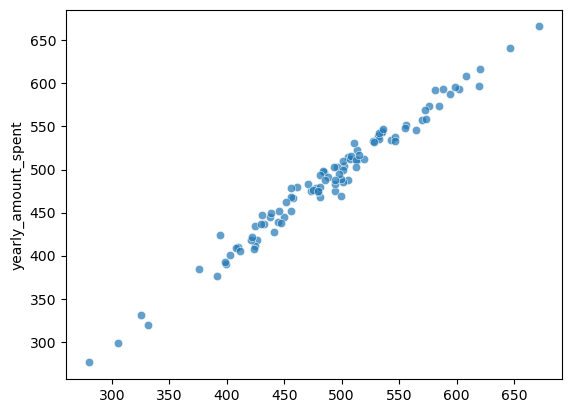

In [82]:
sns.scatterplot(x=pred, y=y_test, alpha=0.7)

In [84]:
# Residual errors : 
residuals = y_test - pred

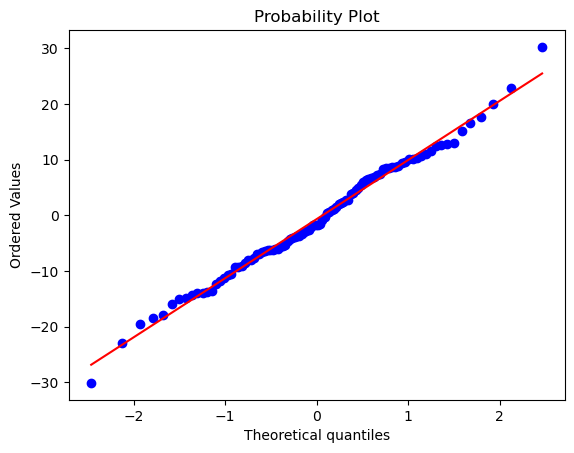

In [88]:
import pylab 
import scipy.stats as stats 

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()